# 7. 케라스 완전 정복

## 7.2. 케라스 모델을 만드는 여러 방법

### 7.2.1 Sequential 모델

In [2]:
# 7.1: Sequential 클래스
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

2024-11-12 10:50:57.362965: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# 7-2: 점진적으로 Sequential 모델 만들기
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [4]:
# 7-3,4: build() 메서드가 호출 전의 모델은 가중치가 없다. 그러므로 가중치를 만들기 위해 모델 호출
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.04588303,  0.06753704,  0.23841876,  0.1820038 , -0.23032762,
         -0.24117807,  0.24537146, -0.10598639,  0.09198183,  0.09921631,
         -0.12883027,  0.07362947, -0.07140951,  0.12661022, -0.23298582,
         -0.25802776,  0.08786228,  0.00519189, -0.06261785, -0.22227708,
          0.18540278,  0.11900851, -0.09430952,  0.25440603,  0.19022152,
         -0.06432799, -0.24605645,  0.14909151,  0.2942763 ,  0.15497604,
          0.17164972, -0.2849294 , -0.06107697, -0.27070948,  0.22192574,
          0.2563392 ,  0.15246874,  0.2680577 , -0.21077523,  0.0990164 ,
          0.12001595, -0.00905186,  0.0757032 ,  0.12309864, -0.18211567,
         -0.03600019, -0.15225478,  0.23582608, -0.05931255,  0.05687326,
          0.19428861,  0.20262092, -0.12798266, -0.27268046, -0.25690484,
          0.18864724,  0.06168413,  0.25231063, -0.1140281 ,  0.23844993,
         -0.03829068,  0.05188757, -0.23451

In [5]:
# 7-5: summary() 메서드
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 7-6: name 매개변수로 모델과 층에 이름 지정하기
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 7-7 모델의 입력 크기를 미리 지정하기
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [8]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.add(layers.Dense(10, activation="softmax"))

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### 7.2.2. 함수형 API

In [11]:
# 7-8: 2개의 Dense 층을 가진 간단한 함수형 모델
inputs = keras.Input(shape=(3,), name="my_input") 
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs) 

In [12]:
# 모델이 처리할 데이터의 타입과 크기 - 심볼릭 텐서
inputs = keras.Input(shape=(3,), name="my_input")

In [13]:
inputs.shape

TensorShape([None, 3])

In [14]:
inputs.dtype

tf.float32

In [15]:
features = layers.Dense(64, activation="relu")(inputs)

In [16]:
features.shape

TensorShape([None, 64])

In [17]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [18]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_8 (Dense)             (None, 64)                256       
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


<b>다중 입력, 다중 출력 모델

In [19]:
# 7-9: 다중 입력, 다중 출력 함수형 모델
vocabulary_size = 10000
num_tags = 100
num_departments = 4

# 모델의 입력 정의
title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

# 입력 특성을 하나의 텐서 feature로 연결
features = layers.Concatenate()([title, text_body, tags])
# 중간층을 적용하여 입력 특성을 더 풍부한 표현으로 재결합
features = layers.Dense(64, activation="relu")(features)

# 모델 출력 정의
priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

# 입력과 출력을 지정해 모델 생성
model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [20]:
# 7-10: 입력과 타깃 배열 리스트를 전달하여 모델 훈련하기
import numpy as np

num_samples = 1280

# 더미 입력 데이터
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# 더미 타깃 데이터
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 3ms/step


In [21]:
# 7-11: 입력과 타깃 배열을 딕셔너리로 전달하여 모델 훈련하기
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
# 9, 10번째 줄 - 부여한 이름을 통해 데이터를 딕셔너리로 전달
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 5ms/step


<b>함수형 API의 장점: 층 연결 구조 활용하기

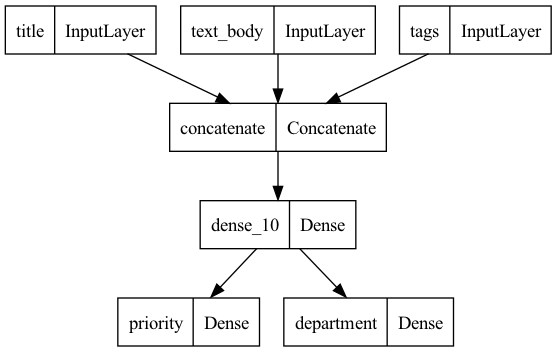

In [22]:
keras.utils.plot_model(model, "ticket_classifier.png")

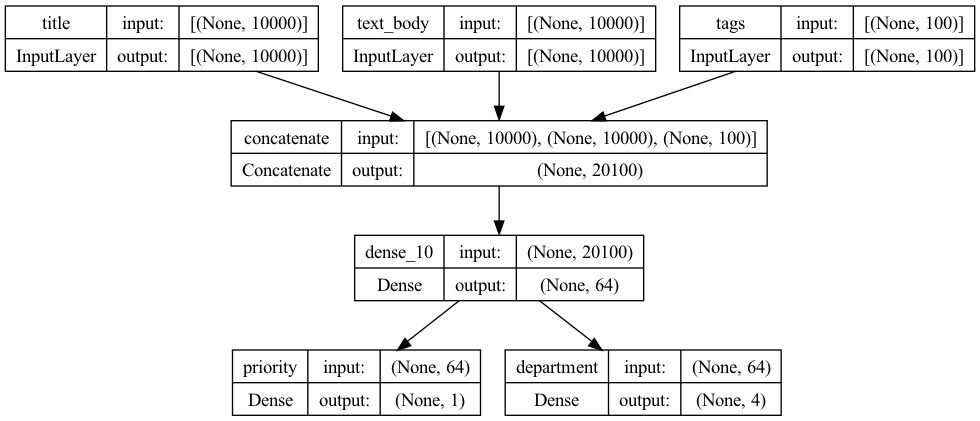

In [23]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

In [24]:
# 7-12: 함수형 모델에 있는 층의 입력과 출력을 출력
model.layers

In [25]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [26]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

In [27]:
# 7-13: 중간층의 출력을 재사용해서 새로운 모델 만들기
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

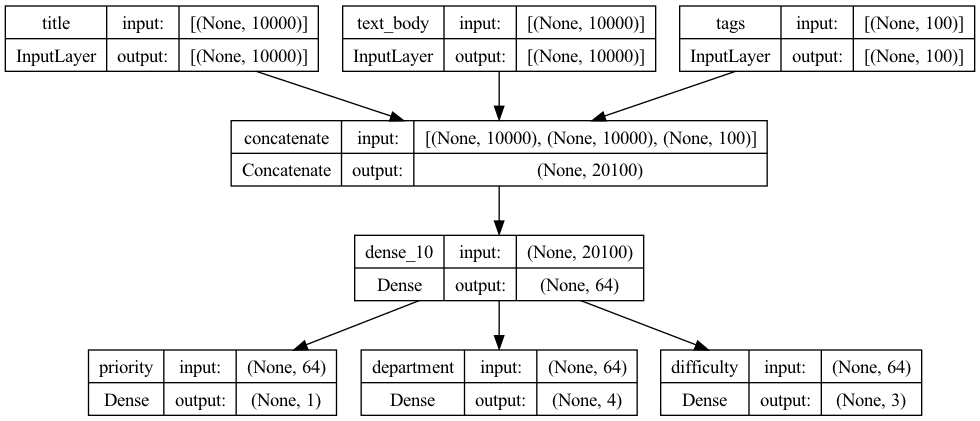

In [28]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

### 7.2.3. Model 서브클래싱
- \_\_init\_\_() 메서드에서 모델이 사용할 층 정의
- call() 메서드에서 앞서 만든 층을 사용하여 모델의 정방향 패스를 정의
- 서브클래스의 객체를 만들고 데이터와 함께 호출하여 가중치 생성

In [29]:
# 7-14: 간단한 서브클래싱 모델
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        # 무보 클래스의 생성자 호출
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    # call() 메서드에서 정방향 패스를 정의
    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [30]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [31]:
model.compile(optimizer="rmsprop",
              # 손실과 측정 지표로 전달하는 값은 call() 메서드가 반환하는 것과 일치해야 함
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
# 입력 데이터 구조는 call() 메서드가 기대하는 것과 일치해야 함 - 여기서는 title, text_body, tags 키를 가진 딕셔너리.
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
           # 타깃 데이터의 구조는 call() 메서드가 반환하는 것과 정확히 일치해야 함 - 여기서는 2개의 원소를 가진 리스트
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 0s 3ms/step


<b> 서브클래싱된 모델이 지원하지 않는 것 </b>
- 다양한 메서드와 메서드를 통한 정보를 활용할 수 없음 (ex. call()의 정보, summary() 출력, plot_model(), ...)

### 7.2.4. 여러 방식을 혼합하여 사용하기

In [32]:
# 7-15: 서브클래싱한 모델을 포함하는 함수형 모델 만들기
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [33]:
# 7-16: 함수형 모델을 표함하는 서브클래싱 모델 만들기
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

### 7.2.5. 작업에 적합한 도구 사용하기
- 함수형 API : 쉬운 사용성과 유연성 사이에 적절한 절충점
- 일반적으로 서브클래싱 층을 포함한 함수형 모델을 사용하면 함수형 API의 장점을 유지하면서 높은 개발 유연성 확보 가능

## 7.3. 내장된 훈련 루프와 평가 루프 사용하기

In [34]:
# 7-17: 표준 워크플로: compile(), fit(), evaluate(), predict()
from tensorflow.keras.datasets import mnist

# 모델 생성 (이후에 재사용 할 수 있도록 함수로 생성)
def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 9s 5ms/step - loss: 0.2947 - accuracy: 0.9112 - val_loss: 0.1390 - val_accuracy: 0.9605
Epoch 2/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1595 - accuracy: 0.9531 - val_loss: 0.1104 - val_accuracy: 0.9685
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


워크플로 커스터마이징
- 사용자 정의 측정 지표 전달
- `fit()` 메서드에 **콜백**(callback)을 전달하여 훈련하는 동안 특정 시점에 수행될 행동을 예약

### 7.3.1. 사용자 정의 지표 만들기

In [ ]:
# 7-18: Metric 클래스를 상속하여 사용자 정의 지표 구현하기
import tensorflow as tf

# metric 클래스 상속
class RootMeanSquaredError(keras.metrics.Metric):

    # 생성자에서 상태 변수 정의. 층과 마찬가지로 add_weight() 메서드 사용
    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    # 역전파로 업데이트가 되지 않으므로 상태 업데이트 로직을 update_state() 메서드 안에 직접 작성
    def update_state(self, y_true, y_pred, sample_weight=None):
        # y_pred는 각 클래스에 대한 확률을 담고 있으므로 이에 맞추어 원-핫 인코딩 변환
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    # 현재 지표 값 반환
    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    # 객체 상태 초기화 - 지표 객체 하나를 서로 다른 훈련 반복에 사용하거나 훈련, 평가에 모두 사용 가능
    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

진행 표시줄에 RMSE 값이 표시

In [36]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2933 - accuracy: 0.9129 - rmse: 7.1785 - val_loss: 0.1506 - val_accuracy: 0.9564 - val_rmse: 7.3606
Epoch 2/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1573 - accuracy: 0.9550 - rmse: 7.3531 - val_loss: 0.1173 - val_accuracy: 0.9668 - val_rmse: 7.4033
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0897 - accuracy: 0.9747 - rmse: 7.4362


### 7.3.2. 콜백 사용하기
- 콜백을 사용하면 모델 스스로 판단하고 동적으로 작동할 수 있게 됨

**콜백을 사용하는 몇 가지 사례**
- 모델 체크포인트 저장 : 훈련하는 동안 어떤 지점에서 모델의 현재 가중치 저장
- 조기 종료 : 검증 손실이 더 이상 향상되지 않을 때 훈련 중지
- 훈련하는 동안 하이퍼파라미터 값을 동적으로 조정 : 옵티마이저의 학습률 같은 경우
- 훈련과 검증 지표를 로그에 기록하거나 모델이 학습한 표현이 업데이트될 때마다 시각화 : ex. `fit()` 메서드의 진행 표시줄

**ModelCheckpoint와 EarlyStopping 콜백**

In [37]:
# 7-19: fit() 메서드에서 callbacks 매개변수 사용하기
# fit() 메서드의 vallbacks 매개변수를 사용하여 콜백의 리스트를 모델로 전달
callbacks_list = [
    keras.callbacks.EarlyStopping( # 성능 향상이 머무면 훈련 중지
        monitor="val_accuracy", # 모델의 검증 정확도를 모니터링
        patience=2, # 두 번의 에포크 동안 정확도가 향상되지 않으면 훈련 중지
    ),
    keras.callbacks.ModelCheckpoint( # 매 에포크 끝에서 현재 가중치 저장
        filepath="checkpoint_path.h5", # 모델 파일의 저장 경로
        # 아래 두 매개변수는 val_loss가 좋아지지 않으면 모델 파일을 저장하지 않음을 의미 
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]) # 정확도를 모니터링하므로 모델 지표에 포함되어야 함
# 콜백이 검증 손실, 정확도를 모니터링 하기에 fit()을 호출할 때 val_data 매개변수로 검증 데이터를 전달
# 학습 후 항상 모델을 수동으로 저장할 수 있음
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2930 - accuracy: 0.9132 - val_loss: 0.1451 - val_accuracy: 0.9585
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1620 - accuracy: 0.9542 - val_loss: 0.1171 - val_accuracy: 0.9690
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1298 - accuracy: 0.9632 - val_loss: 0.1018 - val_accuracy: 0.9731
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1144 - accuracy: 0.9673 - val_loss: 0.1008 - val_accuracy: 0.9727
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1055 - accuracy: 0.9725 - val_loss: 0.0962 - val_accuracy: 0.9768
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0925 - accuracy: 0.9750 - val_loss: 0.0920 - val_accuracy: 0.9769
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0889 - accuracy: 0.9760 - val_loss: 0.0877 - val_accurac

In [38]:
# 저장된 모델 불러오기
model = keras.models.load_model("checkpoint_path.h5")

### 7.3.3. 사용자 정의 콜백 만들기
- on_epoch_begin
- ...

In [39]:
# 7-20: Callback 클래스를 상속하여 사용자 정의 콜백 만들기
#       훈련 도중 배치 손실 값을 리스트에 추가하고 에포크 끝에서 이 값을 그래프로 저장하는 예
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.2947 - accuracy: 0.9116 - val_loss: 0.1557 - val_accuracy: 0.9541
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1565 - accuracy: 0.9553 - val_loss: 0.1168 - val_accuracy: 0.9683
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1272 - accuracy: 0.9633 - val_loss: 0.0993 - val_accuracy: 0.9739
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1137 - accuracy: 0.9683 - val_loss: 0.0961 - val_accuracy: 0.9762
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1023 - accuracy: 0.9724 - val_loss: 0.0934 - val_accuracy: 0.9762
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0950 - accuracy: 0.9740 - val_loss: 0.0899 - val_accuracy: 0.9786
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0862 - accuracy: 0.9761 - val_loss: 0.1047 - val_accura

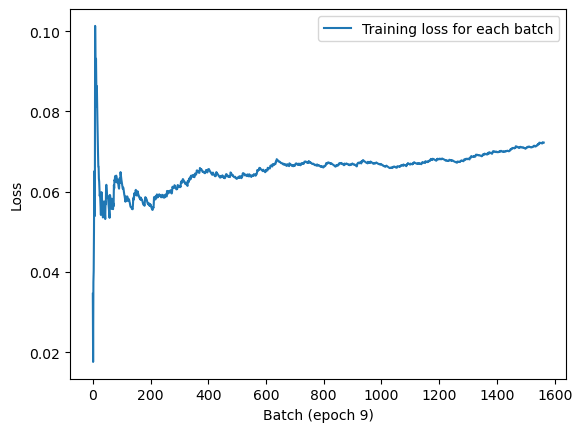

In [40]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

### 7.3.4. 텐서보드를 사용한 모니터링과 시각화
모델의 최종 손실 외에 더 많은 정보를 모니터링하면 모델 작동에 대한 명확한 그림을 그릴 수 있기에 모델을 더 빠르게 개선 가능

In [41]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 지정한 위치에 콜백 로그 기록
tensorboard = keras.callbacks.TensorBoard(
    log_dir="./tb_logs",
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2902 - accuracy: 0.9146 - val_loss: 0.1544 - val_accuracy: 0.9555
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1578 - accuracy: 0.9546 - val_loss: 0.1131 - val_accuracy: 0.9689
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1292 - accuracy: 0.9633 - val_loss: 0.1079 - val_accuracy: 0.9705
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1130 - accuracy: 0.9685 - val_loss: 0.0976 - val_accuracy: 0.9746
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1023 - accuracy: 0.9719 - val_loss: 0.0958 - val_accuracy: 0.9738
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0943 - accuracy: 0.9732 - val_loss: 0.0914 - val_accuracy: 0.9781
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0878 - accuracy: 0.9760 - val_loss: 0.0888 - val_accuracy

In [42]:
%load_ext tensorboard
%tensorboard --logdir ./tb_logs

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
Traceback (most recent call last):
  File "/Users/ian/opt/anaconda3/envs/tf/bin/tensorboard", line 7, in <module>
    from tensorboard.main import run_main
  File "/Users/ian/opt/anaconda3/envs/tf/lib/python3.11/site-packages/tensorboard/main.py", line 27, in <module>
    from tensorboard import default
  File "/Users/ian/opt/anaconda3/envs/tf/lib/python3.11/site-packages/tensorboard/default.py", line 33, in <module>
    from tensorboard.plugins.audio import audio_plugin
  File "/Users/ian/opt/anaconda3/envs/tf/lib/python3.11/site-packages/tensorboard/plugins/audio/audio_plugin.py", line 25, in <module>
    from tensorboard.data import provider
  File "/Users/ian/opt/anaconda3/envs/tf/lib/python3.11/site-packages/tensorboard/data/__init__.py", line 17, in <module>
    from tensorboard.data import experimental  # noqa: F401
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ian/opt/anaconda3/envs/tf/lib/p

## 7.4. 사용자 정의 훈련, 평가 루프 만들기

### 7.4.1. 훈련 vs. 추론
- Dropout 충과 같은 일부 케라스 층은 훈련과 추론에서 동작이 다름 : `dropout(input, training=True)` - 정방향 패스에만 동작
- 훈련 가능한 가중치와 훈련되지 않는 가중치 구분 : `model.weights` 대신 `model.trainabel_weights` 사용

In [43]:
# 지도 학습을 위한 훈련 스텝 구현
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(input, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.grdients(loss, model.trainabel_weights)
    optimizer.apply_gradients(zip(model.trainabel_weights, gradients))

### 7.4.2 측정 지표의 저수준 사용법

In [44]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"결과: {current_result:.2f}")

결과: 1.00


In [45]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"평균 지표: {mean_tracker.result():.2f}")

평균 지표: 2.00


### 7.4.3. 완전한 훈련과 평가 루프

In [ ]:
# 7-21: 단계별 훈련 루프 작성하기: 훈련 스텝 함수
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    # 정방향 패스 실행
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    # 역방향 패스 실행
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    
    # 측정 지표 계산
    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    # 손실 평균 계산
    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

In [47]:
# 7-22: 단계별 훈련 루프 작성하기: 지표 재설정
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

In [48]:
# 7-23: 단계별 훈련 루프 작성하기: 훈련 루프 자체
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"{epoch}번째 에포크 결과")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

2024-11-12 11:38:49.780534: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype uint8 and shape [50000]
	 [[{{node Placeholder/_1}}]]


0번째 에포크 결과
...sparse_categorical_accuracy: 0.9139
...loss: 0.2903
1번째 에포크 결과
...sparse_categorical_accuracy: 0.9533
...loss: 0.1628
2번째 에포크 결과
...sparse_categorical_accuracy: 0.9635
...loss: 0.1315


In [49]:
# 7-24: 단계별 평가 루프 작성하기
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("평가 결과:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

2024-11-12 11:40:34.601379: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype uint8 and shape [10000]
	 [[{{node Placeholder/_1}}]]


평가 결과:
...val_sparse_categorical_accuracy: 0.9687
...val_loss: 0.1122


### 7.4.4. tf.function으로 성능 높이기
- 텐서플로 코드는 계산 그래프로 컴파일 하는 것이 성능 상승 - 전역적인 최적화 가능
- 디버깅할 때는 데코레이터를 쓰지 않고 즉시 실행 모드를 사용하는 것이 좋음

In [50]:
# 7-25: 평가 스텝 함수에 @tf.function 데코레이터 추가하기
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("평가 결과:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

2024-11-12 11:41:44.744831: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype uint8 and shape [10000]
	 [[{{node Placeholder/_1}}]]


평가 결과:
...val_sparse_categorical_accuracy: 0.9687
...val_loss: 0.1122


### 7.4.5. fit() 메서드를 사용자 정의 루프로 활용하기
사용자 정의 훈련 스텝 함수를 제공하고 나머지 처리는 프레임워크에 위힘 가능 - Model 클래스의 train_step() 메서드 오버라이딩
- keras.Model을 상속한 새로운 클래스 생성
- train_step(self, data) 메서드를 오버라이드
- 모델의 Metric 객체를 반환하는 metrics 속성 구현
    - 매 에포크 시작이나 eval 호출 시 모델이 reset_state() 메서드를 자동 호출 = 수동 지표 설정 X


In [51]:
# 7-26: fit()이 사용할 사용자 정의 훈련 스텝 구현
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    # train_step 메서트를 오버라이드
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            # 모델이 클래스 자체이므로 model() 대신에 selt() 사용
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    # 에포크마다 재설정할 지표는 여기 나열
    def metrics(self):
        return [loss_tracker]

In [52]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 9s 5ms/step - loss: 0.2915
Epoch 2/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1561
Epoch 3/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1264


주의할 점
- 이 패턴 때문에 함수형 API로 모델을 만드는 데 문제가 되지 않음. 즉, 어떤 방식을 사용해서 모델을 만들어도 이 방식을 사용할 수 있음
- 프레임워크가 알아서 처리하기 때문에 train_step 메서드를 오버라이딩할 때 @tf.function 데코레이터를 사용할 필요 없음

`Compile()` 메서드를 통해 지표와 손실 설정
- `self.compiled_loss` : 메서드에 전달한 손실 함수
- `self.compiled_metrics` : 메서드에 전달된 지표 목록이 포함되어 있는 객체. `self.compiled_metrics.update_state(`)`를 호출해 모든 지표를 동시에 업데이트 가능
- `self.metrics` : `compile()` 메서드에 전달한 실제 지표의 목록. 앞서 `loss_tracking_metric`으로 수동으로 했던 것과 비슷하게 손실을 추적하는 지표 포함

In [53]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            # self.compiled_loss를 사용해서 손실 계산
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        # self.compiled_metrics로 모델 지표 업데이트
        self.compiled_metrics.update_state(targets, predictions)
        # 측정 지표 이름과 현재 값을 매필한 딕셔너리 반환
        return {m.name: m.result() for m in self.metrics}

In [54]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2979 - sparse_categorical_accuracy: 0.9110
Epoch 2/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1601 - sparse_categorical_accuracy: 0.9538
Epoch 3/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1324 - sparse_categorical_accuracy: 0.9633


## 7.5. 요약
- 케라스는 복잡성의 단계적 공개 원칙을 기반으로 다양한 워크플로 제공. 워크플로는 부드럽게 서로 상호 운영 가능
- Sequential 클래스, 함수형 API를 사용하거나 Model 클래스를 상속하여 모델을 만들 수 있음. 대부분 함수형 API를 사용할 것.
- 모델을 훈련하고 평가하는 가장 간단한 방법은 기본으로 제공되는 `fit()`과 `evaluation()` 메서드를 사용하는 것
- 케라스의 콜백은 `fit()`메서드가 실행되는 동안 모델을 모니터링하고 모델의 상태에 따라 자동으로 행동을 수행할 수 있는 간단한 방법
- `train_steo()`메서드를 오버라이딩하여 `fit()` 메서드의 동작을 완전히 제어할 수 있음
- `fit()` 메서드를 넘어서 밑바닥부터 자신만의 훈련 루프를 작성할 수 있음